### **Loading Data.**
**[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image associated with a label from 10 classes. The dataset serves as a direct drop-in replacement for the original [MNIST dataset](http://yann.lecun.com/exdb/mnist/) for benchmarking machine learning algorithms. It shares the same image size and structure for training and testing splits.**

**After downloading the dataset, I verified that the files are in the appropriate folder.**

**Done By: Sandhya Palaniappan.**



In [1]:
import numpy as np
import pandas as pd

# Input data files are available in the "data/" directory.
# For example, running this will list the files in the input directory
from subprocess import check_output
print(check_output(["ls", "data"]).decode("utf8"))

fashion-mnist_test.csv
fashion-mnist_train.csv
t10k-images-idx3-ubyte
t10k-labels-idx1-ubyte
train-images-idx3-ubyte
train-labels-idx1-ubyte



### **Approach.**
**In this IT3312 - AI Technologies Module's Individual Assignment, I will train a very simple Convolutional Neural Network classifier with 1 convolution layer using the Keras deep learning library.** 

* **The model is first trained for 10 epochs with batch size of 256, compiled with `categorical_crossentropy` loss function and `Adam` optimizer.** 

* **Then, I added data augmentation, which generates new training samples by rotating, shifting and zooming on the training samples, and trained for another 50 epochs.**

* **I will first split the original training data (60,000 images) into 80% training (48,000 images) and 20% validation (12000 images) optimize the classifier, while keeping the test data (10,000 images) to finally evaluate the accuracy of the model on the data it has never seen.**

* **This helps to see whether I'm over-fitting on the training data and whether I should lower the learning rate and train for more epochs if validation accuracy is higher than training accuracy or stop over-training if training accuracy shift higher than the validation.**

In [2]:
# Import libraries
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load training and test data into dataframes
data_train = pd.read_csv('data/fashion-mnist_train.csv')
data_test = pd.read_csv('data/fashion-mnist_test.csv')

# X forms the training images, and y forms the training labels
X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))

# Here I split original training data to sub-training (80%) and validation data (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

# X_test forms the test images, and y_test forms the test labels
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### **Processing Data.**
* **So, After loading and splitting the data, I preprocess it by reshaping it to the exact shape expected by the network and scaling it so that all values fall within the [0, 1] range.**

* **Previously, for example, the training data was stored in an array of shape (60000, 28, 28) of type uint8 with values ranging from [0, 255].**

* **I transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1.**

In [3]:
# Each image's dimension is 28 x 28
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# Prepare the training images
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_train /= 255

# Prepare the test images
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_test = X_test.astype('float32')
X_test /= 255

# Prepare the validation images
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
X_val = X_val.astype('float32')
X_val /= 255

### **CNN with 1 Convolutional Layer.**
**This CNN takes as input tensors of shape (image_height, image_width, image_channels). In this case, I configure the CNN to process inputs of size (28, 28, 1), which is the format of the FashionMNIST images. I do this by passing the argument input_shape=(28, 28, 1) to the first layer.**

* **The 1st layer is  a *Conv2D* layer for the **convolution** operation that extracts features from the input images by sliding a convolution filter over the input to produce a feature map. Here I choose feature map with size 3 x 3.**
* **The 2nd layer is a *MaxPooling2D* layer for the **max-pooling** operation that reduces the dimensionality of each feature, which helps shorten training time and reduce number of parameters. Here I choose the pooling window with size 2 x 2.**
* **To combat overfititng, I add a *Dropout* layer as the 3rd layer, a powerful regularization technique. **Dropout** is the method used to reduce overfitting. It forces the model to learn multiple independent representations of the same data by randomly disabling neurons in the learning phase. In this model, dropout will randomnly disable 20% of the neurons.**
* **The next step is to feed the last output tensor into a stack of *Dense* layers, otherwise known as **fully-connected** layers. These densely connected classifiers process vectors, which are 1D, whereas the current output is a 3D tensor. Thus, I need to **flatten** the 3D outputs to 1D, and then add 2 *Dense* layers on top.**
* **I do a 10-way classification (as there are 10 classes of fashion images), using a final layer with 10 outputs and a softmax activation. **Softmax** activation enables me to calculate the output based on the probabilities. Each class is assigned a probability and the class with the maximum probability is the model’s output for the input.**

In [6]:
# Import Keras libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

cnn1 = Sequential()
cnn1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.2))

cnn1.add(Flatten())

cnn1.add(Dense(128, activation='relu'))
cnn1.add(Dense(10, activation='softmax'))

**When compiling the model, I choose categorical_crossentropy as the loss function, which is relevant for multiclass, single-label classification problems, and the Adam optimizer.**
* **The cross-entropy loss calculates the error rate between the predicted value and the original value. The formula for calculating cross-entropy loss is given [here](https://en.wikipedia.org/wiki/Cross_entropy).**
* **Categorical is used because there are 10 classes to predict from. If there were 2 classes, I would have used binary_crossentropy.**
* **The Adam optimizer is an improvement over SGD (Stochastic Gradient Descent). The optimizer is responsible for updating the weights of the neurons via backpropagation. It calculates the derivative of the loss function with respect to each weight and subtracts it from the weight. That is how a neural network learns.**

In [7]:
cnn1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

**Let's display the architecture of this simple CNN model.**

In [8]:
cnn1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


* **There are 693,962 parameters available for training.**
* **The outputs of the Conv2D and MaxPooling2D layers are 3D tensors with the shape (height, width, channels).**
* **The number of channels is determined by the first argument passed to the *Conv2D layer*, which is 32 in this case.**
* **The (13, 13, 32) outputs from the Dropout layer are flattened into vectors of shape (5408,) before passing through two *Dense* layers.**

In [9]:
history1 = cnn1.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 30s 621us/step - loss: 0.5460 - acc: 0.8085 - val_loss: 0.3817 - val_acc: 0.8690
Epoch 2/10
48000/48000 [==============================] - 31s 649us/step - loss: 0.3627 - acc: 0.8712 - val_loss: 0.3390 - val_acc: 0.8828
Epoch 3/10
48000/48000 [==============================] - 30s 635us/step - loss: 0.3191 - acc: 0.8868 - val_loss: 0.3118 - val_acc: 0.8906
Epoch 4/10
48000/48000 [==============================] - 31s 645us/step - loss: 0.2957 - acc: 0.8940 - val_loss: 0.3012 - val_acc: 0.8938
Epoch 5/10
48000/48000 [==============================] - 42s 865us/step - loss: 0.2718 - acc: 0.9034 - val_loss: 0.2881 - val_acc: 0.8968
Epoch 6/10
48000/48000 [==============================] - 38s 800us/step - loss: 0.2587 - acc: 0.9087 - val_loss: 0.2890 - val_acc: 0.8938
Epoch 7/10
48000/48000 [==============================] - 30s 623us/step - loss: 0.2461 - acc: 0.9108 - val_loss: 0.

### **Training the Model.**
**As mentioned earlier, I train the model with a batch size of 256 for 10 epochs on both the training and validation data.**

In [10]:
score1 = cnn1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.2484699842095375
Test accuracy: 0.9104


**My accuracy is 91.04%, quite impressive!**

### **Data Augmentation.**
**Overfitting can occur when there are too few samples to learn from, making it difficult to train a model that generalizes well to new data.** 

**If I had an infinite amount of data, my model would be exposed to every possible aspect of the data distribution, preventing overfitting.**

**Data augmentation addresses this by generating more training data from existing samples through a series of random transformations that produce realistic images. Therefore, the goal is for the model to never see the exact same image twice during training, helping it to generalize better.**

**In Keras, data augmentation is implemented by configuring various random transformations in the ImageDataGenerator instance:**
* ***rotation_range:* Specifies the range of degrees (0–180) within which to randomly rotate images.**
* ***width_shift* and *height_shift:* Define the range (as a fraction of total width or height) within which to randomly translate images vertically or horizontally.**
* ***shear_range:* Applies random shearing transformations.**
* ***zoom_range:* Performs random zooming into images.**

In [11]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=256)
val_batches = gen.flow(X_val, y_val, batch_size=256)

**Let's train the network with data augmentation.**

In [13]:
history1 = cnn1.fit_generator(batches, steps_per_epoch=48000//256, epochs=50,
                    validation_data=val_batches, validation_steps=12000//256, use_multiprocessing=True)

Epoch 1/50
187/187 [==============================] - 35s 188ms/step - loss: 0.3706 - acc: 0.8633 - val_loss: 0.3606 - val_acc: 0.8665
Epoch 2/50
187/187 [==============================] - 40s 214ms/step - loss: 0.3636 - acc: 0.8654 - val_loss: 0.3414 - val_acc: 0.8747
Epoch 3/50
187/187 [==============================] - 45s 243ms/step - loss: 0.3503 - acc: 0.8685 - val_loss: 0.3401 - val_acc: 0.8750
Epoch 4/50
187/187 [==============================] - 38s 205ms/step - loss: 0.3487 - acc: 0.8709 - val_loss: 0.3428 - val_acc: 0.8755
Epoch 5/50
187/187 [==============================] - 36s 195ms/step - loss: 0.3351 - acc: 0.8756 - val_loss: 0.3373 - val_acc: 0.8718
Epoch 6/50
187/187 [==============================] - 38s 202ms/step - loss: 0.3314 - acc: 0.8778 - val_loss: 0.3354 - val_acc: 0.8736
Epoch 7/50
187/187 [==============================] - 38s 201ms/step - loss: 0.3313 - acc: 0.8758 - val_loss: 0.3363 - val_acc: 0.8735
Epoch 8/50
187/187 [==============================] - 3

In [14]:
score1 = cnn1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.22102486880123615
Test accuracy: 0.9229


**Great news! I have improved the accuracy to 92.29%!**


### **Results.**
**Let's plot the training and validation accuracy, along with the training and validation loss.**





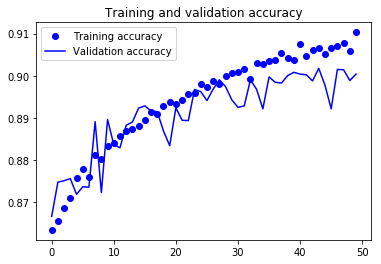

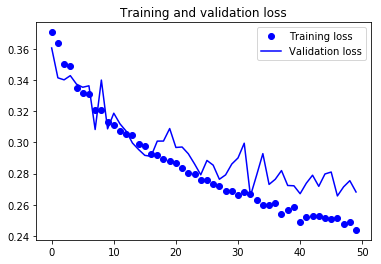

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history1.history['acc']
val_accuracy = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**These plots look good: The training curves closely follow the validation curves.**

### **Classification Report.**
**Here is a summary of my classifier's performance.**

In [17]:
# get the predictions for the test data.
predicted_classes = cnn1.predict_classes(X_test)

# get the indices to be plotted.
y_true = data_test.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [18]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.88      0.88      0.88      1000
    Class 1       0.99      0.99      0.99      1000
    Class 2       0.93      0.83      0.87      1000
    Class 3       0.92      0.94      0.93      1000
    Class 4       0.86      0.90      0.88      1000
    Class 5       0.98      0.98      0.98      1000
    Class 6       0.77      0.79      0.78      1000
    Class 7       0.96      0.97      0.96      1000
    Class 8       0.98      0.99      0.99      1000
    Class 9       0.98      0.96      0.97      1000

avg / total       0.92      0.92      0.92     10000



**It is evident that the classifier is underperforming for class 6 in both precision and recall. For class 4, the classifier shows slightly lower precision, while for class 2, it shows slightly lower recall.**

**I might gain more insight by visualizing the correct and incorrect predictions.**

**Here is a subset of correctly predicted classes.**

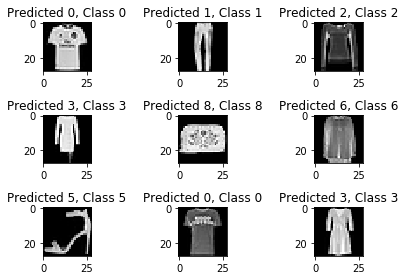

In [19]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

**Here is a subset of incorrectly predicted classes.**

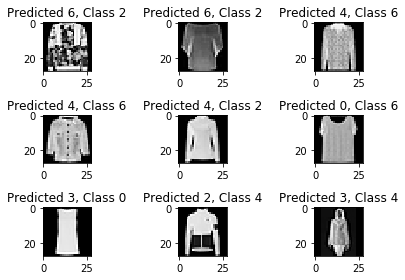

In [20]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()

### **Visualizing What My Model Learns.**

**It's often said that deep-learning models are "black boxes," learning representations that are difficult to extract and present in a human-readable form. While this may be true for some types of deep-learning models, it's not the case for convolutional neural networks (convnets). The representations learned by convnets are particularly suited for visualization because they represent visual concepts.**

**Here, I attempt to visualize the intermediate outputs (intermediate activations) of a CNN. Visualizing intermediate activations involves displaying the feature maps produced by various convolution and pooling layers in the network for a given input. The output of a layer, often called its activation (the result of the activation function), reveals how an input is decomposed by the different filters learned by the network.**

**To visualize feature maps with three dimensions—width, height, and depth (channels)—I independently plot the contents of each channel as a 2D image, as each channel encodes relatively independent features.**

**I start by obtaining an input test image (#100).**

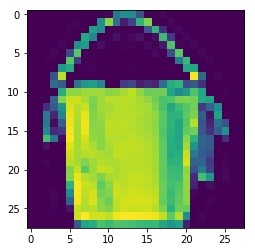

In [24]:
test_im1 = X_train[100]
plt.imshow(test_im1.reshape(28,28), cmap='viridis', interpolation='none')
plt.show()

**To extract the feature maps I'm interested in, I create a Keras model designed to take batches of images as input and output the activations of all convolutional and pooling layers.** 

**This is achieved using the Keras Model class, which is created with two arguments: an input tensor (or list of input tensors) and an output tensor (or list of output tensors).** 

**The resulting instance is a Keras model that maps the specified inputs to the specified outputs. When provided with an image input, this model returns the activation values of the layers in the original model.**

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=[<tf.Tenso...)`
  This is separate from the ipykernel package so we can avoid doing imports until


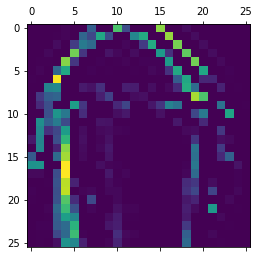

In [25]:
from keras import models
# extracts the outputs of the top 8 layers.
layer_outputs = [layer.output for layer in cnn1.layers[:8]]

# creates a model that will return these outputs, given the model input.
activation_model = models.Model(input=cnn1.input, output=layer_outputs)

# returns a list of Numpy arrays: one array per layer activation.
activations = activation_model.predict(test_im1.reshape(1,28,28,1))

# activation of the 1st convolution layer.
first_layer_activation = activations[0]

# display the 4th channel of the activation of the 1st layer of the original model.
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

**Now, let's do the same for two other test images: number 500 and number 1000.**


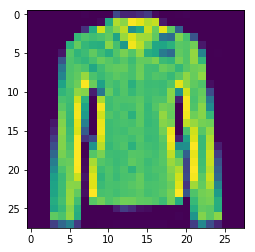

In [26]:
test_im2 = X_train[500]
plt.imshow(test_im2.reshape(28,28), cmap='viridis', interpolation='none')
plt.show()

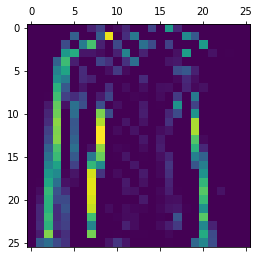

In [27]:
activations = activation_model.predict(test_im2.reshape(1,28,28,1))
first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

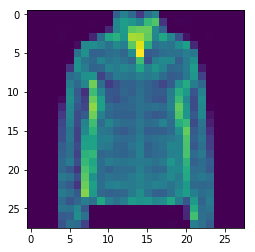

In [28]:
test_im3 = X_train[1000]
plt.imshow(test_im3.reshape(28,28), cmap='viridis', interpolation='none')
plt.show()

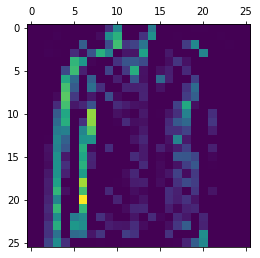

In [29]:
activations = activation_model.predict(test_im3.reshape(1,28,28,1))
first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

### **Let's Plot a Complete Visualization of All the Activations in the Network.**

**I will extract and plot every channel in each of the eight activation maps, then stack the results into one large image tensor, with channels arranged side by side.**

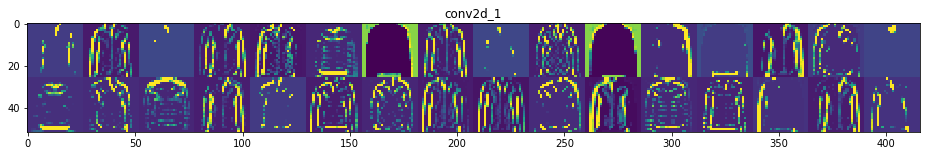

In [30]:
layer_names = []
for layer in cnn1.layers[:-1]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

### **Conclusion.**

**In this individual assignment, I developed a basic CNN with a single convolutional layer to classify images from the Fashion-MNIST dataset. The model initially achieved a test accuracy of 91.04%, which improved to 92.29% after implementing data augmentation. This individual assignment highlighted the effectiveness of simple CNN architectures combined with data augmentation techniques in achieving high classification accuracy.** 

**For future work, adding more convolutional layers, experimenting with different hyperparameters, and incorporating additional regularization methods could further improve the model’s performance. This individual assignment highlighted the importance of fundamental CNN design and the impact of data augmentation on model accuracy.**
